In [1]:
pip install fuzzywuzzy


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install stop-words


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install basemap


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install chardet


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install imageio


Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json,os
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter

import fuzzywuzzy
from fuzzywuzzy import process
import chardet
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings('ignore')
import re
from wordcloud import WordCloud, STOPWORDS
#viz
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

import plotly.offline as pyo

from plotly.graph_objs import *
import plotly.graph_objs as go

import imageio
import folium
import folium.plugins as plugins
os.environ['PROJ_LIB'] = 'C:/Users/shouv/Anaconda3/Lib/site-packages/mpl_toolkits/basemap'
from mpl_toolkits.basemap import Basemap


business = pd.read_json('yelp_academic_dataset_business.json', lines=True)

d:\Restaurant-Recommendation-System-using-Yelp-Dataset\.venv\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### First we will chek the columns of the business data

In [10]:
business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [11]:
business.categories.isnull().sum()

103

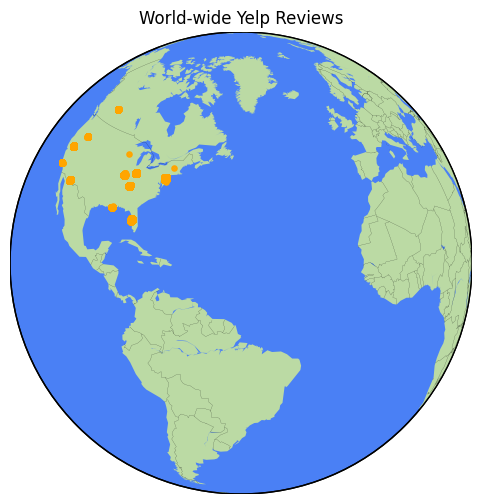

In [12]:
plt.figure(1, figsize=(15,6))
m1=Basemap(projection='ortho',lat_0=20,lon_0=-50)

m1.fillcontinents(color='#bbdaa4',lake_color='#4a80f5')
m1.drawmapboundary(fill_color='#4a80f5')
m1.drawcountries(linewidth=0.1, color="black")

mxy = m1(business["longitude"].tolist(), business["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="orange", lw=3, alpha=1, zorder=5)
plt.title("World-wide Yelp Reviews")
plt.show()

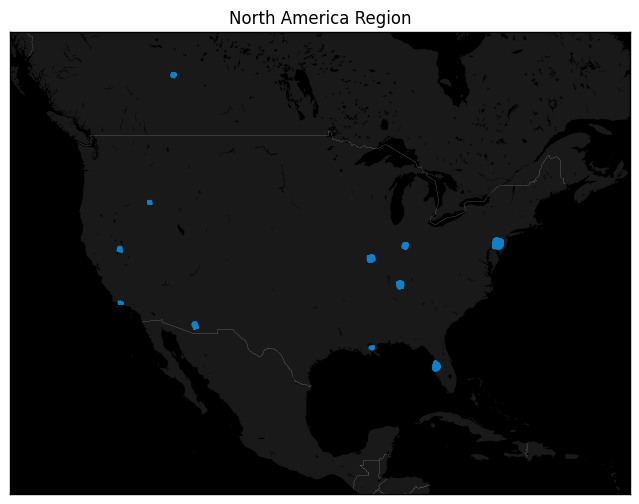

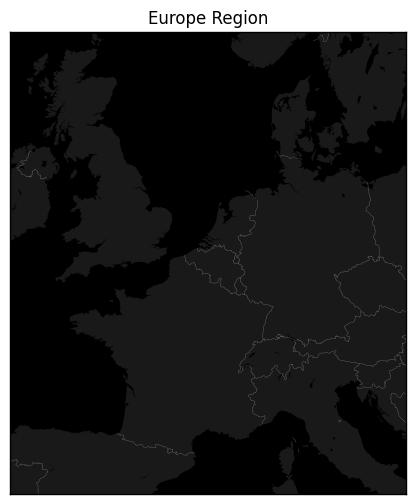

In [13]:
lon_min, lon_max = -132.714844, -59.589844
lat_min, lat_max = 13.976715,56.395664

idx_NA = (business["longitude"]>lon_min) &\
            (business["longitude"]<lon_max) &\
            (business["latitude"]>lat_min) &\
            (business["latitude"]<lat_max)
NA_business=business[idx_NA]

plt.figure(figsize=(12,6))
m2 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m2.fillcontinents(color='#191919',lake_color='#000000')
m2.drawmapboundary(fill_color='#000000')               
m2.drawcountries(linewidth=0.1, color="w")              

mxy = m2(NA_business["longitude"].tolist(), NA_business["latitude"].tolist())
m2.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=0.05, zorder=5)

plt.title("North America Region")
lon_min, lon_max = -8.613281,16.699219
lat_min, lat_max = 40.488737,59.204064

idx_euro = (business["longitude"]>lon_min) &\
            (business["longitude"]<lon_max) &\
            (business["latitude"]>lat_min) &\
            (business["latitude"]<lat_max)
euro_business=business[idx_euro]

plt.figure(figsize=(12,6))
m3 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m3.fillcontinents(color='#191919',lake_color='#000000') 
m3.drawmapboundary(fill_color='#000000')                
m3.drawcountries(linewidth=0.1, color="w")              

# Plot the data
mxy = m3(euro_business["longitude"].tolist(), euro_business["latitude"].tolist())
m3.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=0.05, zorder=5)

plt.title("Europe Region")
plt.show()

In [14]:
business.categories = business.categories.fillna(" ")

In [15]:
business.categories.isnull().sum()

0

In [16]:
business.business_id.describe()

count                     150346
unique                    150346
top       Pns2l4eNsfO8kk83dixA6A
freq                           1
Name: business_id, dtype: object

In [17]:
business_overall = business.assign(categories = business.categories.str.split(', ')).explode('categories')
cat = business_overall.categories.value_counts()
cat = cat.to_frame().reset_index()
cat.columns = ['Categories', 'Count']
cat

,Categories,Count
0,Restaurants,52268
1,Food,27781
2,Shopping,24395
3,Home Services,14356
4,Beauty & Spas,14292
...,...,...
1307,Patent Law,1
1308,Hainan,1
1309,Housing Cooperatives,1
1310,Guamanian,1


In [18]:
cat= cat.sort_values(by = 'Count', ascending = False)

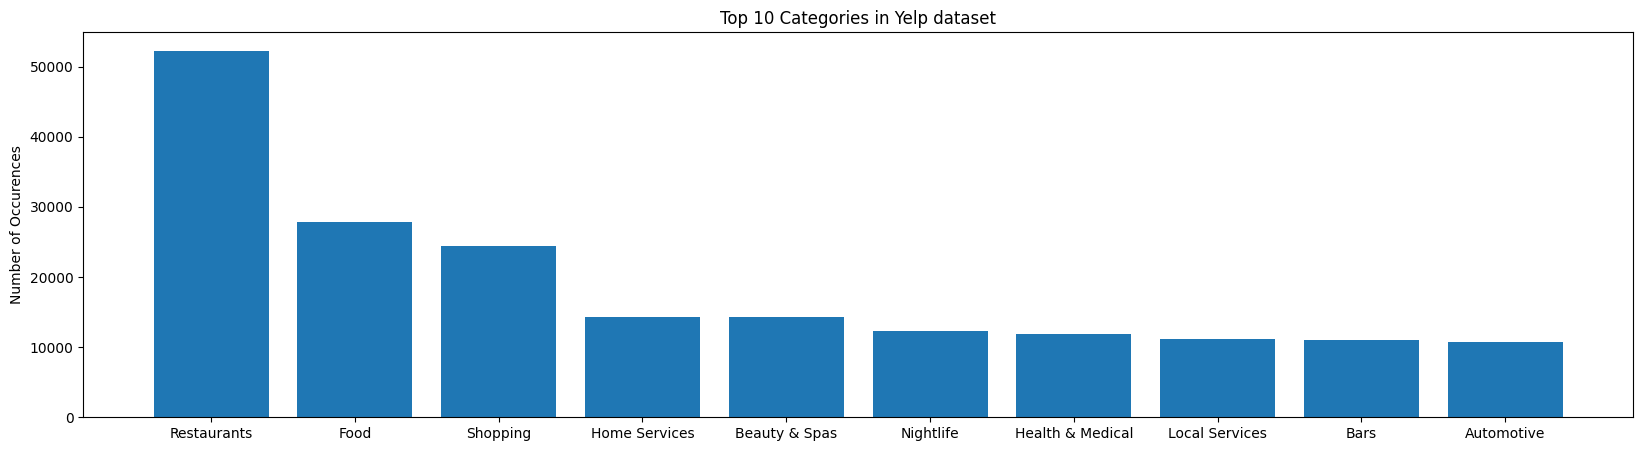

In [19]:
cat = cat[0:10]
objects = list(cat.Categories)
y_pos = np.arange(len(objects))
Numbers = list(cat.Count)

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Occurences')
plt.title('Top 10 Categories in Yelp dataset')
plt.show()

In [20]:
# categories = business.categories
# for i in categories:
#     if 'Restaurants' in i or 'Food' in i:
#         print(i)

In [21]:
# Create a boolean mask to filter rows that contain 'Restaurants' or 'Food' in the categories
mask = business['categories'].apply(lambda x: 'Restaurants' in x or 'Food' in x)

# Filter the DataFrame using the mask
b = business[mask].reset_index(drop=True)


In [22]:
bus = b

In [23]:
bus['attributes'][1]

{'BusinessAcceptsCreditCards': 'True',
 'WheelchairAccessible': 'True',
 'RestaurantsTakeOut': 'True',
 'BusinessParking': "{'garage': None, 'street': None, 'validated': None, 'lot': True, 'valet': False}",
 'BikeParking': 'True',
 'GoodForKids': 'True',
 'Caters': 'False'}

In [24]:
# business = business.assign(categories = business.categories.str.split(', ')).explode('categories')
# count = business.categories.value_counts().tolist()
# res_cat = business.categories.tolist()
# res_cat = list(set(res_cat))

In [25]:
# count = business.categories.value_counts().tolist()
# categories_list = business.categories.str.split().tolist()
# categories_list

In [26]:
# business = business[business.categories.str.contains('Restaurants|Food|Nightlife|Bars', case=True,na=False)]
# business

In [27]:
# business = business.assign(categories = business.categories.str.split(', ')).explode('categories')
# business = business[business.categories.str.contains('Restaurants', case=True,na=False)]
# business

In [28]:
# Taking into the consideration the businesses which are open
# 1 = open, 0 = closed
bus = bus[bus['is_open']==1]

In [29]:
# taking into consideration US states only

states = pd.Series(["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA",
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"])

In [30]:
avg_stars = pd.pivot_table(bus[bus['state'].isin(states)] , index = ['state'],
                    values = ['stars'], aggfunc = np.mean)

avg_stars=avg_stars.sort_values('stars',ascending=False)

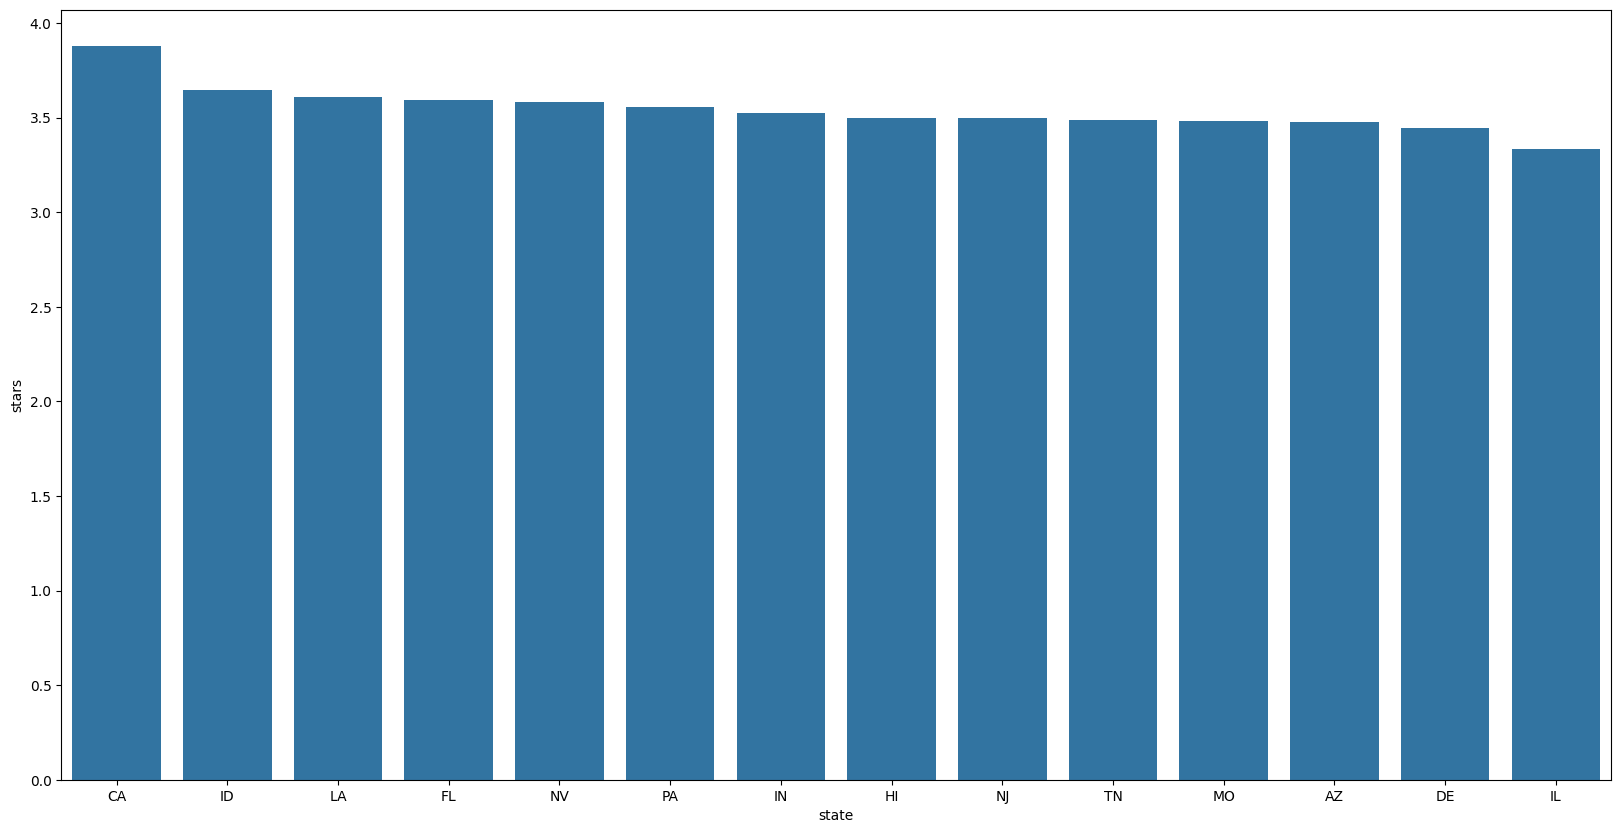

In [31]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
a = sns.barplot(x=avg_stars.index, y="stars", data=avg_stars)

In [32]:
state_count = bus.state.value_counts()

In [33]:
state_count = state_count.to_frame().reset_index()
state_count.columns = ['State', 'Counts']

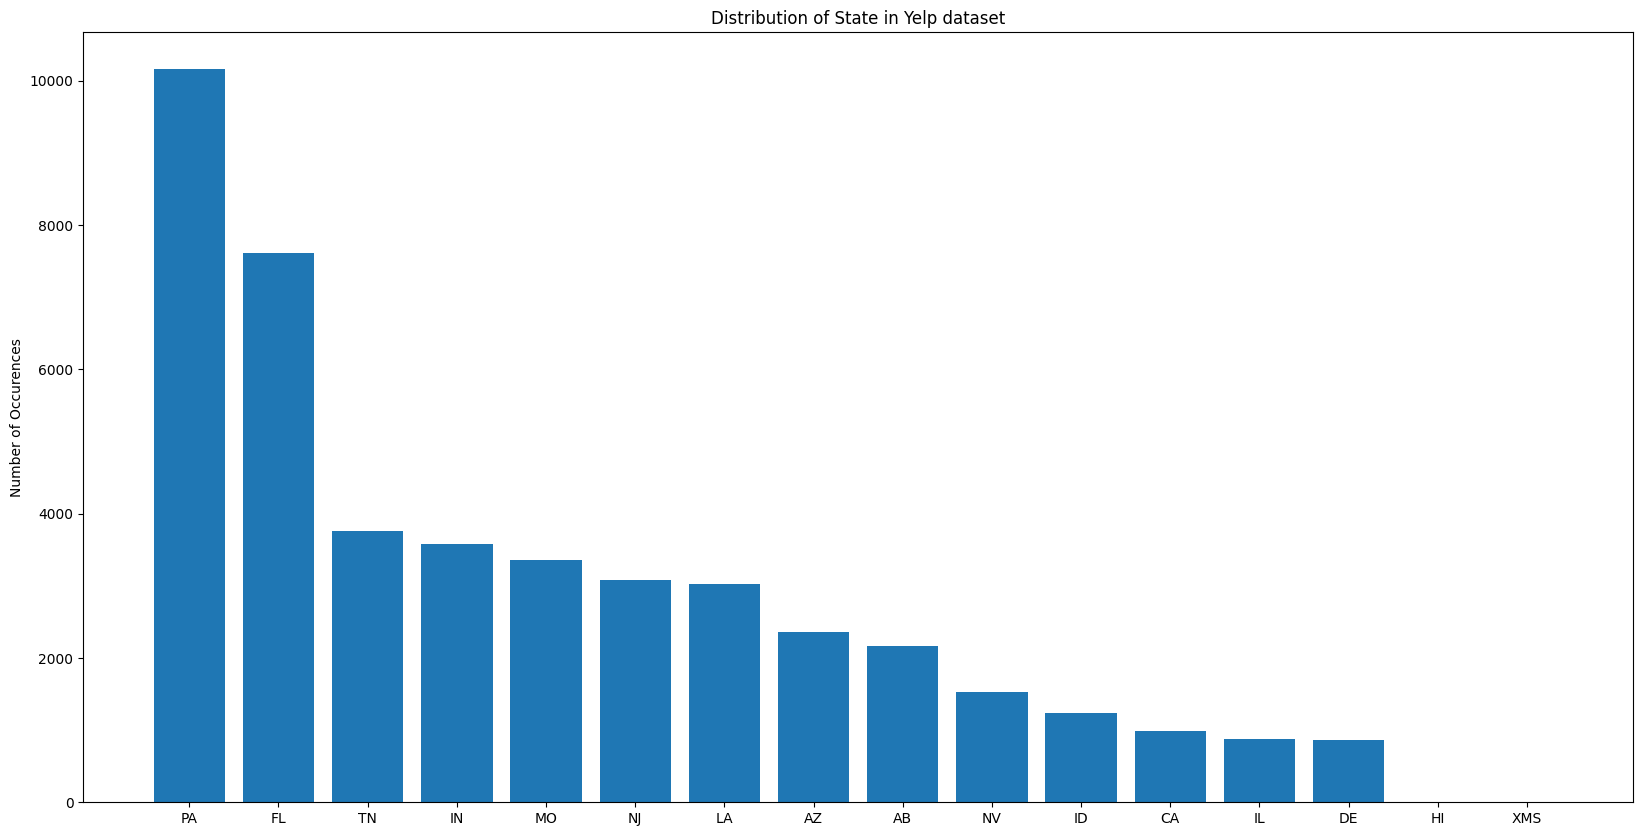

In [34]:
objects = list(state_count.State)
y_pos = np.arange(len(objects))
Numbers = list(state_count.Counts)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Occurences')
plt.title('Distribution of State in Yelp dataset')
plt.show()



In [35]:
business_in_IL = bus[bus.state == 'IL']

In [36]:
business_in_IL = business_in_IL.reset_index(drop = True)

In [37]:
business_in_IL

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,ljxNT9p0y7YMPx0fcNBGig,Tony's Restaurant & 3rd Street Cafe,312 Piasa St,Alton,IL,62002,38.896563,-90.186203,3.0,94,1,"{'RestaurantsReservations': 'True', 'Restauran...","Restaurants, Specialty Food, Steakhouses, Food...","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:30',..."
1,EuRGgOwJ0g1vTj2R04j37Q,Crafty Crab,51 Ludwig Dr,Fairview Heights,IL,62208,38.601298,-89.989683,2.5,14,1,"{'BusinessParking': '{u'valet': False, u'garag...","Seafood, Restaurants","{'Monday': '12:0-22:0', 'Tuesday': '12:0-22:0'..."
2,zjQDk4tZyhEroyqtkgvx0g,The Cobblestone Eatery and Drinkery,115 W St Louis St,Lebanon,IL,62254,38.604107,-89.808533,3.5,52,1,"{'RestaurantsDelivery': 'False', 'BestNights':...","American (Traditional), Nightlife, Breakfast &...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ..."
3,gI34hM-873fwF1XQ8hOaSg,Joe’s Pizza and Pasta,"5775 Godfrey Rd, Ste A",Godfrey,IL,62035,38.949183,-90.190306,4.0,17,1,"{'HasTV': 'True', 'RestaurantsTableService': '...","Salad, Pizza, Restaurants, Italian","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."
4,FzelkV3vzxkRgBmVSIqALA,Edley’s,2392 S State Rt 157,Glen Carbon,IL,62034,38.773325,-89.992930,3.0,34,1,"{'OutdoorSeating': 'True', 'HasTV': 'True', 'R...","Barbeque, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,jhTvowxVAMCnAsObNta8kw,LuciAnna's Pastries,607 E Broadway,Alton,IL,62002,38.889527,-90.176815,4.5,34,1,"{'BikeParking': 'True', 'BusinessParking': '{'...","Restaurants, Food, Bakeries, Patisserie/Cake Shop","{'Tuesday': '6:30-15:0', 'Wednesday': '6:30-15..."
871,H9I0agL8A8r1eBh6p66o_Q,Pizza Hut,5913 N Illinois St,Fairview Heights,IL,62208,38.586224,-89.985703,2.5,8,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsRes...","Pizza, Restaurants, Fast Food, Italian, Chicke...","{'Monday': '10:30-22:0', 'Tuesday': '10:30-22:..."
872,cdbEEL_0TLOPgdfsB3PUvA,Subway,413 Belt Line Rd,Collinsville,IL,62234,38.691322,-89.974966,2.5,9,1,"{'BikeParking': 'True', 'NoiseLevel': 'u'avera...","Restaurants, Sandwiches, Fast Food","{'Monday': '10:30-19:30', 'Tuesday': '10:30-19..."
873,eQ83iTisgPFzJ1YBO3p-IA,Domino's Pizza,4000 W Main St,Belleville,IL,62226,38.536365,-90.019293,2.0,22,1,"{'RestaurantsGoodForGroups': 'False', 'GoodFor...","Chicken Wings, Pizza, Sandwiches, Restaurants","{'Monday': '10:0-1:0', 'Tuesday': '10:0-1:0', ..."


In [38]:
type(business_in_IL.attributes[1])

dict

In [39]:
def get_superset_of_column_names_from_file(data):
    column_names = set()

    for line_contents in data:
        column_names.update(
                set(get_column_names(line_contents))
                )
    return column_names

def get_column_names(line_contents):
    """Return a list of flattened key names given a dict.
    Example:
        line_contents = {
            'a': {
                'b': 2,
                'c': 3,
                },
        }
        will return: ['a.b', 'a.c']
    These will be the column names for the eventual csv file.
    """
    column_names = []
    if line_contents is None:
        return ''
    for k in line_contents.keys():
        column_names.append('{0}'.format(k)
        )

    return column_names

In [40]:
superset_cols = get_superset_of_column_names_from_file(business_in_IL.attributes)

# put all those columns in the dataset and initilize them to nan
for col in superset_cols:
    business_in_IL[col]= np.nan

In [41]:
idx = 0
for attr in business_in_IL.attributes:
    if attr is None:
        idx+=1
        continue
    for k,v in attr.items():
        if'{' in v:
            continue
        business_in_IL[k][idx] = v
    idx+=1

In [42]:
null_val = pd.DataFrame(business_in_IL.isna().sum())
print("Null values: ",null_val)
print('n')
print('\n')
print("Shape of original data", business_in_IL.shape)

Null values:                                0
business_id                   0
name                          0
address                       0
city                          0
state                         0
postal_code                   0
latitude                      0
longitude                     0
stars                         0
review_count                  0
is_open                       0
attributes                   11
categories                    0
hours                       108
GoodForKids                 303
Alcohol                     366
RestaurantsGoodForGroups    297
BikeParking                 282
Ambience                    856
BestNights                  875
GoodForDancing              839
OutdoorSeating              263
Music                       875
Open24Hours                 874
NoiseLevel                  444
RestaurantsAttire           351
GoodForMeal                 867
Caters                      362
HappyHour                   741
BYOBCorkage               

In [43]:
col_del = list(null_val[null_val.iloc[:,0] >300].index)# columns to keep
col_del

['GoodForKids',
 'Alcohol',
 'Ambience',
 'BestNights',
 'GoodForDancing',
 'Music',
 'Open24Hours',
 'NoiseLevel',
 'RestaurantsAttire',
 'GoodForMeal',
 'Caters',
 'HappyHour',
 'BYOBCorkage',
 'CoatCheck',
 'ByAppointmentOnly',
 'WheelchairAccessible',
 'WiFi',
 'BYOB',
 'DriveThru',
 'Corkage',
 'HasTV',
 'RestaurantsTableService',
 'DogsAllowed',
 'BusinessParking',
 'DietaryRestrictions',
 'BusinessAcceptsBitcoin',
 'Smoking',
 'RestaurantsCounterService']

In [44]:
business_in_IL.drop(columns=col_del).isna().sum()

business_id                     0
name                            0
address                         0
city                            0
state                           0
postal_code                     0
latitude                        0
longitude                       0
stars                           0
review_count                    0
is_open                         0
attributes                     11
categories                      0
hours                         108
RestaurantsGoodForGroups      297
BikeParking                   282
OutdoorSeating                263
RestaurantsTakeOut             84
RestaurantsPriceRange2        135
BusinessAcceptsCreditCards     90
RestaurantsReservations       264
RestaurantsDelivery           131
dtype: int64

In [45]:
business_in_IL = business_in_IL.drop(columns=col_del)

In [47]:
# test-1
category_elements = []
for i in business_in_IL.index:
    elements = business_in_IL.categories[i].split(',')
#     category_elements.update(business_in_IL.categories[i].split(','))
    for element in elements:
        category_elements.append(element)
#         print(element)

In [48]:
category_elements = [x.strip(' ') for x in category_elements]
category_elements

['Restaurants',
 'Specialty Food',
 'Steakhouses',
 'Food',
 'Italian',
 'Pizza',
 'Pasta Shops',
 'Seafood',
 'Restaurants',
 'American (Traditional)',
 'Nightlife',
 'Breakfast & Brunch',
 'Event Planning & Services',
 'Venues & Event Spaces',
 'Italian',
 'Bars',
 'Restaurants',
 'Salad',
 'Pizza',
 'Restaurants',
 'Italian',
 'Barbeque',
 'Restaurants',
 'Restaurants',
 'Pizza',
 'Comfort Food',
 'American (New)',
 'American (Traditional)',
 'Restaurants',
 'Southern',
 'Restaurants',
 'Diners',
 'Restaurants',
 'Fast Food',
 'Burgers',
 'Fast Food',
 'Restaurants',
 'Breakfast & Brunch',
 'Vegetarian',
 'Mexican',
 'Tacos',
 'Fast Food',
 'Greek',
 'Italian',
 'Restaurants',
 'Restaurants',
 'Coffee & Tea',
 'Food',
 'Burgers',
 'Fast Food',
 'Steakhouses',
 'Salad',
 'Restaurants',
 'Seafood',
 'Mexican',
 'Restaurants',
 'Salad',
 'Soup',
 'Chinese',
 'Restaurants',
 'Restaurants',
 'Fast Food',
 'Tex-Mex',
 'Tacos',
 'Mexican',
 'Mexican',
 'Restaurants',
 'Restaurants',
 'Sout

In [49]:
Counter(category_elements).most_common(20)

[('Restaurants', 723),
 ('Food', 321),
 ('Fast Food', 208),
 ('American (Traditional)', 159),
 ('Burgers', 146),
 ('Sandwiches', 115),
 ('Nightlife', 113),
 ('Bars', 112),
 ('Breakfast & Brunch', 100),
 ('Pizza', 98),
 ('Mexican', 87),
 ('Coffee & Tea', 72),
 ('American (New)', 71),
 ('Chicken Wings', 66),
 ('Shopping', 60),
 ('Italian', 55),
 ('Chinese', 52),
 ('Ice Cream & Frozen Yogurt', 52),
 ('Salad', 49),
 ('Event Planning & Services', 48)]

In [50]:
# category_ele = list(category_ele)
features = Counter(category_elements).most_common(20)
feature = [x[0] for x in features]

for col in feature:
    business_in_IL[col]= np.nan
# for i in feature:
#     print(str(i))
for i in feature:
    for index in business_in_IL.index:

        if i in business_in_IL.categories[index]:
            business_in_IL[i][index] = 1
        else:
            business_in_IL[i][index] = 0

In [51]:
(business_in_IL.columns)

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'RestaurantsGoodForGroups',
       'BikeParking', 'OutdoorSeating', 'RestaurantsTakeOut',
       'RestaurantsPriceRange2', 'BusinessAcceptsCreditCards',
       'RestaurantsReservations', 'RestaurantsDelivery', 'Restaurants', 'Food',
       'Fast Food', 'American (Traditional)', 'Burgers', 'Sandwiches',
       'Nightlife', 'Bars', 'Breakfast & Brunch', 'Pizza', 'Mexican',
       'Coffee & Tea', 'American (New)', 'Chicken Wings', 'Shopping',
       'Italian', 'Chinese', 'Ice Cream & Frozen Yogurt', 'Salad',
       'Event Planning & Services'],
      dtype='object')

In [52]:
business_in_IL.to_csv("D:\\Workspace\\Data_Mining\\Restaurant_Recomendation_System\\data\\Business_in_Illinois.csv")

In [60]:
reviews = []
with open(os.path.join(os.getcwd(), 'D:/yelp_academic_dataset_review.json'),encoding="utf8") as f:
    for line in f:
        reviews.append(json.loads(line))

In [61]:
reviews = pd.DataFrame(reviews)

In [62]:
business_ratings = pd.merge(business_in_IL, reviews[['review_id', 'business_id', 'stars']], on = 'business_id', how = 'left')

In [63]:
Five_star = business_ratings[business_ratings['stars_y'] == 5.0]

In [64]:
Five_star_order = Five_star.name.value_counts()

In [65]:
Five_star_order = Five_star_order.to_frame().reset_index()
Five_star_order.columns = ['Restaurant', 'Counts']


In [66]:
Five_star_order = Five_star_order.head(10)
Five_star_order = Five_star_order.sort_values(['Counts'], ascending = True)
Five_star_order

,Restaurant,Counts
9,Bella Milano,130
8,Fast Eddie's Bon Air,139
7,Doc's Smokehouse,150
6,Dewey's Pizza,180
5,Lotawata Creek Southern Grill,190
4,Eckert's Country Store & Farms,197
3,Hop House Southern Eatery,210
2,Cleveland-Heath,331
1,Peel Wood Fired Pizza,414
0,BEAST Craft BBQ,425


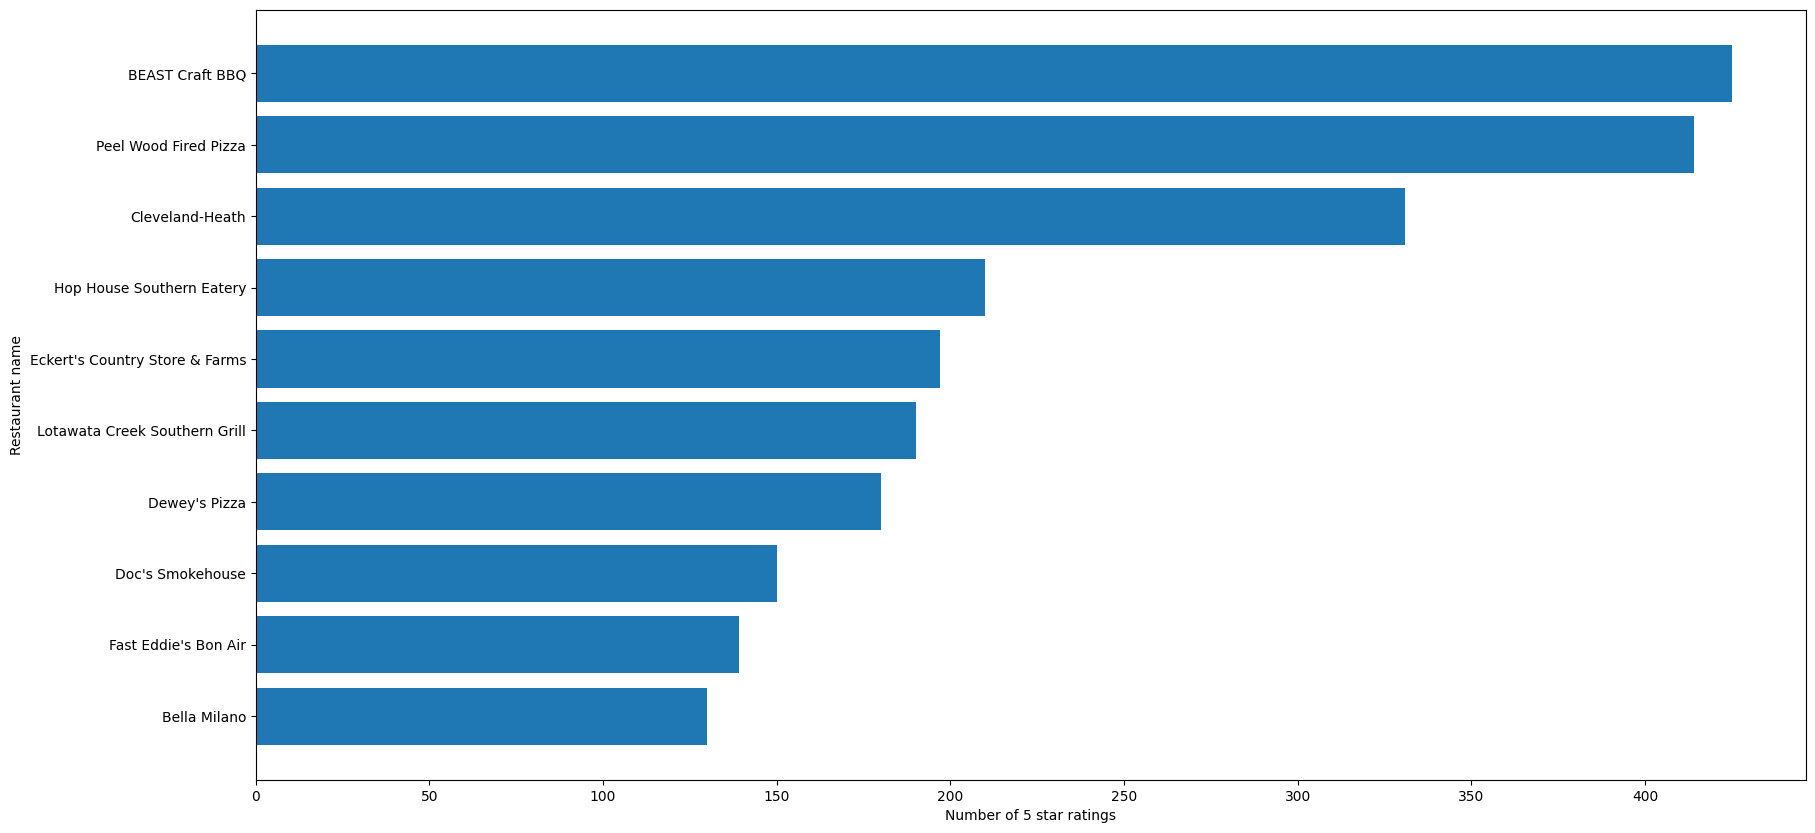

In [67]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)
plt.barh(Five_star_order.Restaurant, Five_star_order.Counts, align = 'center', alpha = 1)
plt.ylabel('Restaurant name')
plt.xlabel('Number of 5 star ratings')
plt.show()

In [68]:
reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [69]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kiss\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
ids = business_in_IL.business_id.to_list()

In [71]:
review_IL = reviews[reviews.business_id.isin(ids)]
review_IL

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
286,91uC4f0aX4ycQTDL5Hq7Mw,huHPQSQgw4kFakc0Vq7TDA,_D7QoWuQKMXk0mEE7r_Ftw,5.0,1,0,1,I have been a fan of Chateau La Vin for a few ...,2014-03-14 13:55:46
678,_qA6-L34QD8ruHD7xRI0Yg,ADsAwRQC3nvNvo4Qdvu2HQ,bQKqeYwaHNal7JFAXzCMFg,5.0,1,0,0,Our 1st visit here. We went through the drive ...,2015-06-21 04:03:17
1093,jvoscRFrS3pA4CgwqEceUg,j3cmlhUwxmbHjTwHiLuhVA,bQKqeYwaHNal7JFAXzCMFg,5.0,0,0,0,"First, I love that they offer food delivery! S...",2017-06-17 17:00:46
2260,4nFZeKPhUu3Km1TDg4Hfnw,0KJs28i3bDhbxhQbgY0i9w,sMjjClYrGEXcTFG66qmg8A,5.0,0,0,0,"I was staying in Columbia for a week, and orde...",2015-04-29 00:21:06
2436,LXA6BSbXwMwQAlGBOtD2EQ,QQn0DByk6xs0hZ72bhJXSA,IS0B5nLJPluVT8NwGgospA,1.0,0,0,0,"Worst service in IL. Lost our order, waited 2...",2018-09-03 01:28:53
...,...,...,...,...,...,...,...,...,...
6988347,Bpp-WFJ02DVkdrXina2vlg,fY7H7k-l3-VxnnEM-wHLvA,N6qpuOBs3SE3wn9t0dRNIg,1.0,1,1,0,This location closes at 9 pm. I got in their l...,2021-06-27 02:51:34
6989213,46FGf2LgBIJD43dlU4z3_A,XW-BonrE_YzzSgfdRD_1KA,0bVcCefYVtvU8MjXC5Na_Q,4.0,1,0,1,The sushi is always good! The bento boxes are ...,2019-01-19 21:37:40
6989958,rZ5iXD1lFIyqy2vQWMJq9w,52NYhDgWwaMTXwVqyYDXVQ,xPxiRUJt-sYZ1Nsm2o8gkw,2.0,0,0,0,"The ""to go"" employee was not very nice. The cu...",2022-01-18 05:27:01
6990121,g5l3iICE40ZhBHraMLZitw,WuXBLay-Aek06VP4cZzFew,_qW1xzvEfIncBRnn3sHTvQ,1.0,0,0,0,We decided to go to the O'Fallon IL Chevys on...,2021-10-14 23:15:56


In [72]:
review_IL = pd.merge(review_IL, business_in_IL[['business_id', 'name']], on = 'business_id', how = 'left')
review_IL

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,name
0,91uC4f0aX4ycQTDL5Hq7Mw,huHPQSQgw4kFakc0Vq7TDA,_D7QoWuQKMXk0mEE7r_Ftw,5.0,1,0,1,I have been a fan of Chateau La Vin for a few ...,2014-03-14 13:55:46,Chateau La VIn
1,_qA6-L34QD8ruHD7xRI0Yg,ADsAwRQC3nvNvo4Qdvu2HQ,bQKqeYwaHNal7JFAXzCMFg,5.0,1,0,0,Our 1st visit here. We went through the drive ...,2015-06-21 04:03:17,Super Gyros
2,jvoscRFrS3pA4CgwqEceUg,j3cmlhUwxmbHjTwHiLuhVA,bQKqeYwaHNal7JFAXzCMFg,5.0,0,0,0,"First, I love that they offer food delivery! S...",2017-06-17 17:00:46,Super Gyros
3,4nFZeKPhUu3Km1TDg4Hfnw,0KJs28i3bDhbxhQbgY0i9w,sMjjClYrGEXcTFG66qmg8A,5.0,0,0,0,"I was staying in Columbia for a week, and orde...",2015-04-29 00:21:06,Thai House
4,LXA6BSbXwMwQAlGBOtD2EQ,QQn0DByk6xs0hZ72bhJXSA,IS0B5nLJPluVT8NwGgospA,1.0,0,0,0,"Worst service in IL. Lost our order, waited 2...",2018-09-03 01:28:53,Cheddar's Scratch Kitchen
...,...,...,...,...,...,...,...,...,...,...
32882,Bpp-WFJ02DVkdrXina2vlg,fY7H7k-l3-VxnnEM-wHLvA,N6qpuOBs3SE3wn9t0dRNIg,1.0,1,1,0,This location closes at 9 pm. I got in their l...,2021-06-27 02:51:34,Starbucks
32883,46FGf2LgBIJD43dlU4z3_A,XW-BonrE_YzzSgfdRD_1KA,0bVcCefYVtvU8MjXC5Na_Q,4.0,1,0,1,The sushi is always good! The bento boxes are ...,2019-01-19 21:37:40,Wasabi Sushi Bar
32884,rZ5iXD1lFIyqy2vQWMJq9w,52NYhDgWwaMTXwVqyYDXVQ,xPxiRUJt-sYZ1Nsm2o8gkw,2.0,0,0,0,"The ""to go"" employee was not very nice. The cu...",2022-01-18 05:27:01,Chili's
32885,g5l3iICE40ZhBHraMLZitw,WuXBLay-Aek06VP4cZzFew,_qW1xzvEfIncBRnn3sHTvQ,1.0,0,0,0,We decided to go to the O'Fallon IL Chevys on...,2021-10-14 23:15:56,Chevys Fresh Mex


In [73]:
review_IL.to_csv("D:\\Workspace\\Data_Mining\\Restaurant_Recomendation_System\\data\\Review_IL_restaurants.csv")